In [1]:
import numpy as np
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import matplotlib.pyplot as plt

import calendar
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

data_17_08 = pd.read_csv('../data/properati/properati-AR-2017-08-01-properties-sell.csv')
data_17_02 = pd.read_csv('../data/properati/properati-AR-2017-02-01-properties-sell.csv')
data_16_08 = pd.read_csv('../data/properati/properati-AR-2016-08-01-properties-sell.csv')
data_16_02 = pd.read_csv('../data/properati/properati-AR-2016-02-01-properties-sell.csv')
data_15_08 = pd.read_csv('../data/properati/properati-AR-2015-08-01-properties-sell.csv')
data_15_02 = pd.read_csv('../data/properati/properati-AR-2015-02-01-properties-sell.csv')
data_14_08 = pd.read_csv('../data/properati/properati-AR-2014-08-01-properties-sell.csv')
data_14_02 = pd.read_csv('../data/properati/properati-AR-2014-02-01-properties-sell.csv')
data_13_08 = pd.read_csv('../data/properati/properati-AR-2013-08-01-properties-sell.csv')

In [2]:
data1_frames = [data_17_08, data_17_02, data_16_08, data_16_02]
data1 = pd.concat(data1_frames)

In [4]:
# sacamos la columna id
data1 = data1.drop(['id'], axis=1)

In [6]:
data2_frames = [data_15_08, data_15_02, data_14_08, data_14_02, data_13_08]
data2 = pd.concat(data2_frames)

In [8]:
data_frames = [data1, data2]
data = pd.concat(data_frames)

In [10]:
data.head(3)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,image_thumbnail,lat,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
0,Argentina,2012-09-19,USD,CASA CON LOCAL EN VENTA EN PADUA.2 DORMITORIOS...,NaN,NaN,NaN,3429244.0,https://thumbs4.properati.com/1/ufoyqwscVk8n3e...,NaN,...,1290.322581,360.36036,http://www.properati.com.ar/udh_venta_casa_mer...,house,NaN,Bs.As. G.B.A. Zona Oeste,93.0,NaN,333.0,CASA EN VENTA
1,Argentina,2012-10-22,USD,CHALET VENTA 4 AMBIENTES PADUA.EXCELENTE CHALE...,NaN,NaN,NaN,3429244.0,https://thumbs4.properati.com/5/I5RS_jAIUseo9H...,NaN,...,1000.000000,1000.00000,http://www.properati.com.ar/20hi_venta_casa_me...,house,NaN,Bs.As. G.B.A. Zona Oeste,220.0,NaN,220.0,CASA EN VENTA
2,Argentina,2012-11-01,NaN,DTO. 2 AMB. C/ VISTA PLENA AL 6 X 3DOMITORIO ...,NaN,NaN,NaN,3430863.0,https://thumbs4.properati.com/5/VjDOdzm9n8uqZu...,-38.019951,...,NaN,NaN,http://www.properati.com.ar/336o_venta_departa...,apartment,2.0,Buenos Aires Costa Atlántica,42.0,NaN,NaN,DTO. 2 AMB. C/ VISTA PLENA AL MAR


In [11]:
#Cuantos lugares (o provincias) reflejan los avisos
data['state_name'].value_counts()

Capital Federal                 78606
Bs.As. G.B.A. Zona Norte        74991
Bs.As. G.B.A. Zona Oeste        42015
Buenos Aires Costa Atlántica    37457
Bs.As. G.B.A. Zona Sur          28232
Córdoba                         24663
Santa Fe                        21276
Buenos Aires Interior            9546
Mendoza                          1936
Río Negro                        1885
Misiones                         1714
Neuquén                          1683
Entre Ríos                       1626
Tucumán                          1133
San Luis                          762
Salta                             707
Corrientes                        693
La Pampa                          620
Chubut                            446
Catamarca                         334
Chaco                             173
San Juan                          138
Tierra Del Fuego                  134
Jujuy                              80
Santa Cruz                         69
Formosa                            66
La Rioja    

In [12]:
# Filtro por Capital Federal y GBA
data = data.loc[(data.state_name=='Capital Federal') | (data.state_name.str.contains('G.B.A'))]

In [13]:
# formateo de fechas
data.created_on = pd.to_datetime(data.created_on, format='%Y/%m/%d')
data['year'] = data['created_on'].map(lambda x: x.year)
data['month'] = data.created_on.dt.month.apply(lambda x: calendar.month_name[x])

In [14]:
data_stats = data.groupby(['year', 'month'])['price'].agg([np.size,np.mean])
data_stats

size           mean
year month                            
2012 December       1.0  185000.000000
     October        1.0  220000.000000
     September      1.0  120000.000000
2013 April          3.0  306666.666667
     August        51.0  138894.736842
     December      10.0  103666.666667
     February       2.0  332500.000000
     January        3.0  315666.666667
     July          28.0  156097.115385
     June          19.0  254833.333333
     March          9.0  177285.714286
     May          229.0  160401.873874
     November      34.0  136166.666667
     October       19.0  172058.823529
     September     10.0  102400.000000
2014 April        145.0  182979.166667
     August       141.0  216186.086957
     December     130.0  241643.619048
     February      12.0  233772.727273
     January       42.0  201075.675676
     July         165.0  179701.418440
     June         630.0  224115.362187
     March       2202.0  208366.642320
     May          145.0  224809.677419
     November     343.0  259349.826087
     October      200.0  180044.720497
     September    193.0  250098.513333
2015 April        617.0  409837.207080
     August      2473.0  281313.166667
     December    3042.0  371098.866195
     February     266.0  267997.089796
     January      397.0  287584.058480
     July        2718.0  207331.321448
     June         449.0  448455.992366
     March       1523.0  432594.691280
     May          656.0  324327.374477
     November    3494.0  367287.571429
     October     4882.0  263786.836790
     September   3606.0  328205.164967
2016 April       5582.0  297593.694351
     August     13878.0  293013.936848
     December   10944.0  434607.452056
     February    6351.0  283836.444806
     January     4892.0  276095.123176
     July        8633.0  356343.026309
     June        7066.0  305299.005394
     March       4624.0  310358.456832
     May         5160.0  270603.957158
     November   11622.0  372930.134571
     October     8214.0  371409.545111
     September   5599.0  297623.004663
2017 April       7767.0  353850.253165
     August       376.0  240165.144509
     February   16460.0  324722.693749
     January    11083.0  305069.999611
     July       44012.0  381763.199719
     June        9256.0  355265.458805
     March       4954.0  369892.886813
     May         8480.0  304855.492190

In [15]:
data.isnull().sum()

country_name                       0
created_on                         0
currency                       26919
description                       16
expenses                      197677
extra                         223844
floor                         200618
geonames_id                    47886
image_thumbnail                 4523
lat                            71651
lat-lon                        71651
lon                            71651
operation                          0
place_name                        54
place_with_parent_names            0
price                          23435
price_aprox_local_currency     23435
price_aprox_usd                23435
price_per_m2                   49583
price_usd_per_m2               85765
properati_url                      0
property_type                      0
rooms                         115319
state_name                         0
surface_covered_in_m2          29197
surface_in_m2                 223844
surface_total_in_m2            62816
t

In [17]:
data_stats2 = data.groupby(['properati_url'])['price'].agg([np.size,np.mean,np.std])
data_stats2.loc[data_stats2['size'] > 0,:].sort_values('size', ascending=False).head(10)

,size,mean,std
properati_url,,,
http://www.properati.com.ar/1131b_venta_departamentos_castelar_estrenar_ivana-e-h-garay-propiedades,3.0,65000.000000,0.000000
http://www.properati.com.ar/10h8q_venta_departamentos_almagro_balcon_parrilla_piscina_sum_vestidor_luminoso_garage_re-max-premium-ii,3.0,166666.666667,5773.502692
http://www.properati.com.ar/111vt_venta_casa_caballito_jardin_lavadero_patio_quincho_dependencias_garage_goldstein-propiedades-srl_9yp,3.0,600000.000000,0.000000
http://www.properati.com.ar/111vy_venta_ph_barracas_patio_goldstein-propiedades-srl_9yp,3.0,76000.000000,0.000000
http://www.properati.com.ar/111w0_venta_departamentos_balvanera_lavadero_patio_toilette_luminoso_impecable_goldstein-propiedades-srl_9yp,3.0,125000.000000,0.000000
http://www.properati.com.ar/111w1_venta_casa_flores_parrilla_patio_terraza_luminoso_aire-acondicionado_goldstein-propiedades-srl_9yp,3.0,385000.000000,0.000000
http://www.properati.com.ar/111wn_venta_casa_la-reja_suite_lavadero_parrilla_piscina_toilette_vestidor_placard_matias-szpira-bienes-raices-ituzaingo,3.0,265000.000000,0.000000
http://www.properati.com.ar/10h9g_venta_casa_lanus_jardin_lavadero_parrilla_patio_piscina_terraza_toilette_vista_garage_placard_re-max-titanium,3.0,186500.000000,0.000000
http://www.properati.com.ar/wnux_venta_ph_quilmes,3.0,75000.000000,0.000000


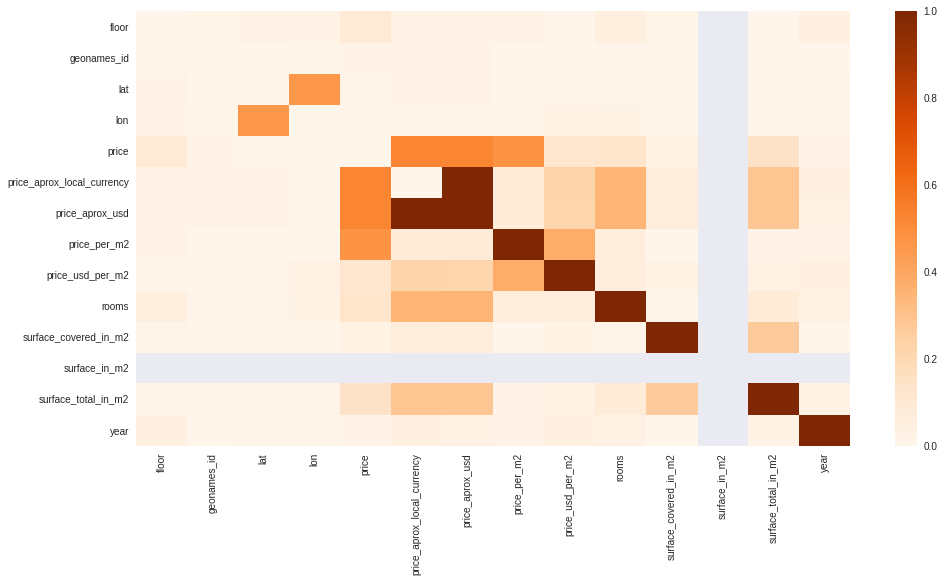

In [18]:
fig, ax = plt.subplots(figsize=(16,8))
cor = data.corr().abs()
cor.values[[np.arange(6)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

In [184]:
data.describe()

,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses
count,1.997130e+05,164542.000000,164542.000000,1.995780e+05,1.995780e+05,1.995780e+05,161322.000000,1.964660e+05,131060.000000,1.688380e+05,20412.000000,120647.000000,2.458600e+04
mean,3.567993e+06,-34.656564,-59.257718,4.227614e+05,3.998520e+06,2.326915e+05,255.661137,1.031052e+04,2089.067534,6.221683e+03,16.556927,3.031911,5.173986e+03
std,3.734317e+05,2.071256,2.351986,1.689535e+06,6.346304e+06,3.681408e+05,2029.543670,4.512178e+06,2807.914666,2.527334e+04,123.435620,1.725182,1.294161e+05
min,3.427208e+06,-54.833014,-122.419415,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.077726,5.000000e-05,1.000000,1.000000,1.000000e+00
25%,3.430234e+06,-34.682001,-58.722767,1.000000e+05,1.495980e+06,8.600000e+04,49.000000,4.500000e+01,1113.486172,1.526611e+03,1.000000,2.000000,1.000000e+03
50%,3.433775e+06,-34.598708,-58.485090,1.785000e+05,2.452586e+06,1.400000e+05,85.000000,7.500000e+01,1735.849057,2.159091e+03,3.000000,3.000000,1.900000e+03
75%,3.832711e+06,-34.444479,-58.393658,3.890000e+05,4.487940e+06,2.600000e+05,215.000000,1.500000e+02,2405.405405,3.240741e+03,6.000000,4.000000,3.800000e+03
max,6.948895e+06,37.774929,3.379206,6.500000e+08,8.212711e+08,4.654544e+07,200000.000000,2.000000e+09,206333.333333,4.000000e+06,7071.000000,40.000000,1.000150e+07


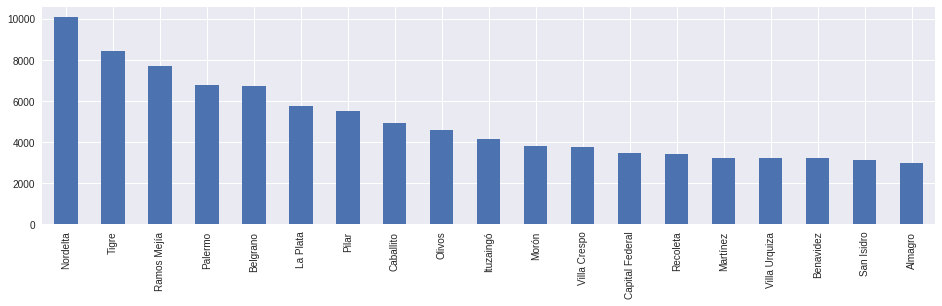

In [19]:
# top 20 lugares con mas ventas

data['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(16,4));

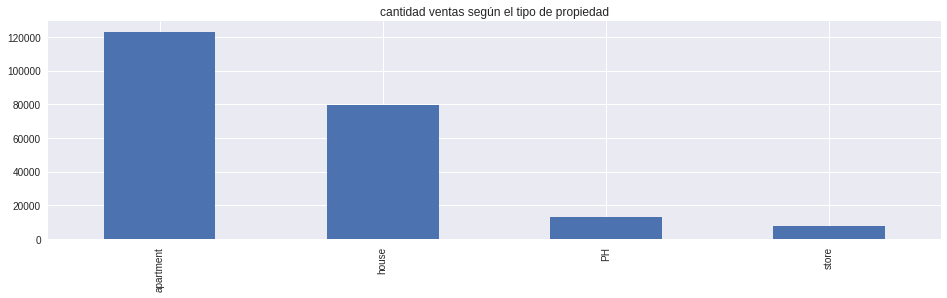

In [20]:
# cantidad de ventas según el tipo de propiedad

data['property_type'].value_counts()[0:19].plot(kind='bar',figsize=(16,4), title="cantidad ventas según el tipo de propiedad");

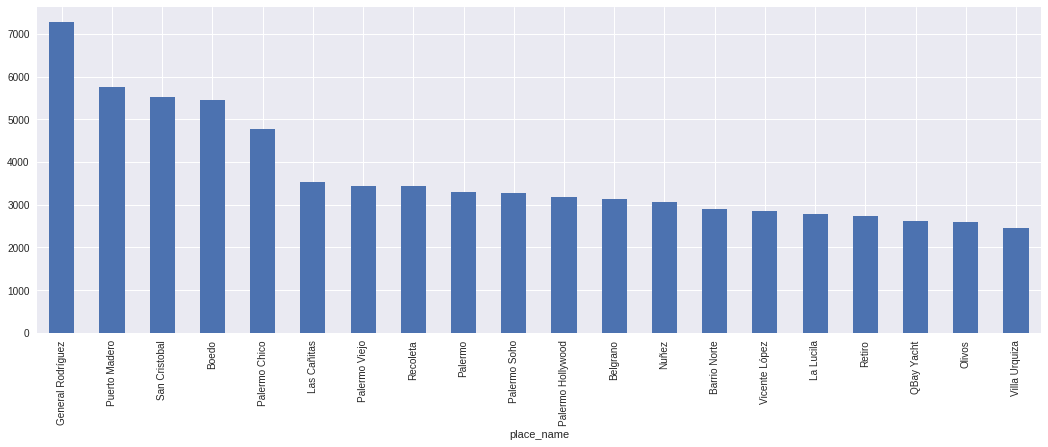

In [22]:
# los 20 lugares mas caros

grouped = data[['place_name','price_usd_per_m2']].groupby('place_name').agg([np.size, np.mean])

# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','mean')].sort_values(ascending=False)[0:20].plot(kind='bar',figsize=(18,6));

In [23]:
data.month.value_counts()

July         55556
February     23091
June         17420
August       16919
January      16417
November     15493
May          14670
December     14127
April        14114
October      13316
March        13312
September     9409
Name: month, dtype: int64

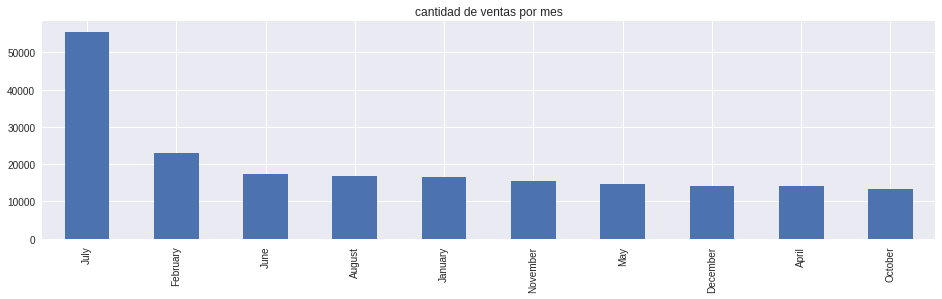

In [24]:
data.month.value_counts()[0:10].plot(kind='bar',figsize=(16,4), title="cantidad de ventas por mes");

In [25]:
grouped = data[['place_name', 'month']].groupby(['place_name','month'])['month'].agg(['count'])
grouped_by_month = grouped.reset_index()

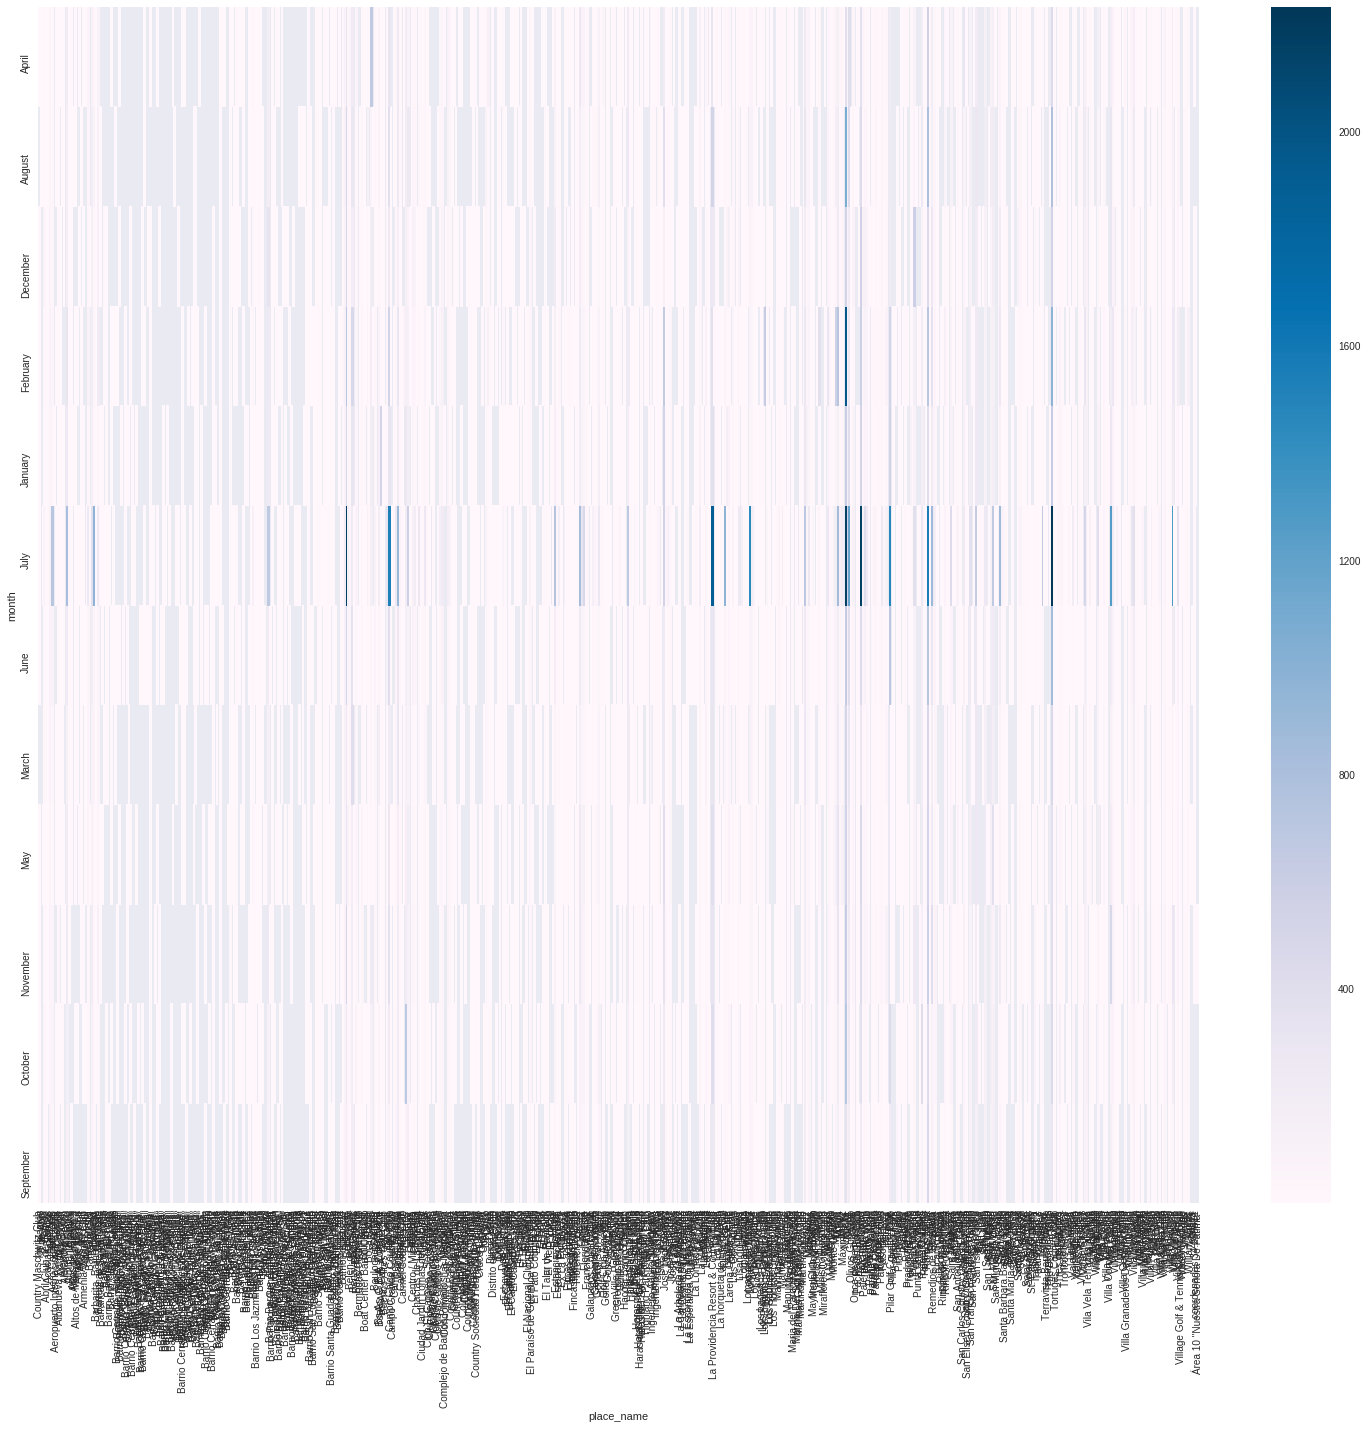

In [26]:
import seaborn as sns

# Heatmap - ventas por mes y lugar
grouped_by_month = pd.pivot_table(grouped_by_month, values='count', columns='place_name', index='month')
fig, ax = plt.subplots(figsize=(26,22))
sns.heatmap(grouped_by_month,cmap='PuBu');

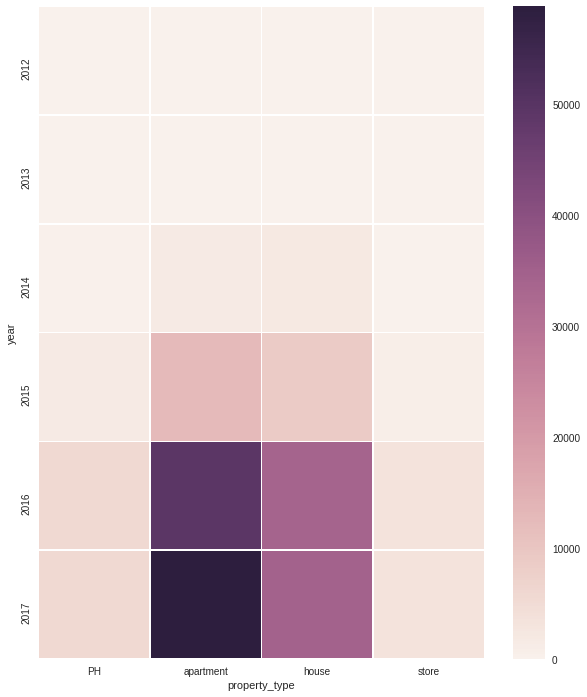

In [28]:
# cantidad de ventas año y tipo de propiedad

data_grouped = data.groupby(['year','property_type']).size().reset_index()
data_grouped.columns=['year','property_type','size']
data_grouped = data_grouped.pivot(index='year', columns='property_type',values='size')
data_grouped.fillna(0,inplace=True)
fig, ax = plt.subplots(figsize=(10,12))
sns.heatmap(data_grouped, annot=False, linewidths=.5, ax=ax);

In [31]:
data_depto = data[data.property_type == 'apartment']

In [32]:
data_depto.head(2)

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,image_thumbnail,lat,...,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title,year,month
5,Argentina,2013-01-04,USD,"Venta - Departamento - Argentina, Buenos Aires...",NaN,NaN,NaN,3429979.0,https://thumbs4.properati.com/8/bJn9FqcBRGi_8H...,-34.429071,...,http://www.properati.com.ar/518a_venta_departa...,apartment,2.0,Bs.As. G.B.A. Zona Norte,54.0,NaN,NaN,Departamento en Venta ubicado en Arcos de Pilar,2013,January
10,Argentina,2013-01-26,USD,"Venta - Departamento - Argentina, Buenos Aires...",NaN,NaN,NaN,3429979.0,https://thumbs4.properati.com/5/hiXoFGFHBiIhV2...,-34.439241,...,http://www.properati.com.ar/59ec_venta_departa...,apartment,2.0,Bs.As. G.B.A. Zona Norte,45.0,NaN,NaN,Departamento en Venta ubicado en Pilar,2013,January


,property_type,place_name,price_usd_per_m2,rooms
121379,apartment,Tigre,2488.713125,32.0
39799,apartment,Almagro,1721.311475,32.0
5390,store,San Telmo,1082.381239,32.0
16102,store,Palermo,1661.971831,30.0
80821,apartment,Moreno,NaN,25.0
112531,apartment,Santa Barbara Barrio Cerrado,3090.909091,22.0
66984,apartment,Monserrat,NaN,22.0
40477,apartment,Monserrat,NaN,22.0
55147,house,Maschwitz,92.307692,20.0
20890,house,San Cristobal,NaN,19.0


In [35]:
data_depto = data_depto[data_depto.rooms < 7]

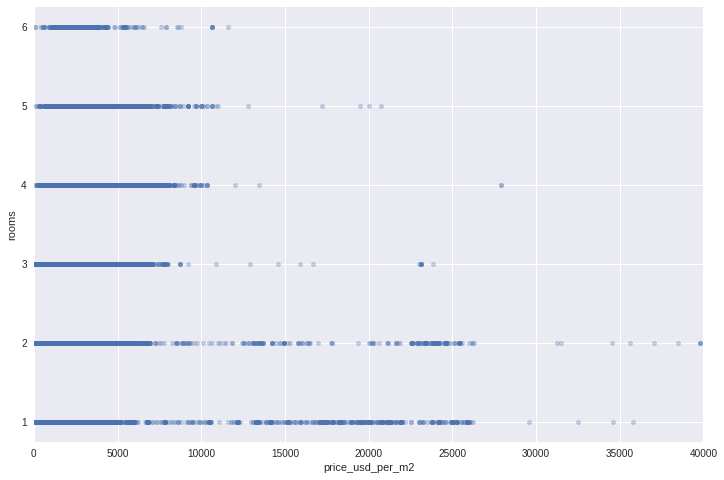

In [36]:
fig = plt.figure()
ax = plt.subplot(111)

data_depto.plot.scatter('price_usd_per_m2','rooms',alpha=0.32,figsize=(12,8),ax=ax);
ax.set_xlim(0,40000);